In [1]:
import h5py
import pandas as pd
import awkward as ak
import km3io as ki
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import (
    GradientBoostingRegressor,
    RandomForestRegressor,
    ExtraTreesRegressor,
    HistGradientBoostingRegressor,
)
from sklearn.neural_network import MLPRegressor

/Users/meskara/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
filename = '/Users/meskara/Desktop/Energy_Reconstruction/Data_for_ML.h5'

Data = h5py.File(filename)

In [4]:
y = Data['E'][:]

a = Data['a'][:]

channel_id = Data['channel_id'][:]

dir_x = Data['dir_x'][:]

dir_y = Data['dir_y'][:]

dir_z = Data['dir_z'][:]

dom_id = Data['dom_id'][:]

pos_x = Data['pos_x'][:]

pos_y = Data['pos_y'][:]

pos_z = Data['pos_z'][:]

t = Data['t'][:]

tdc = Data['tdc'][:]

tot = Data['tot'][:]

trig = Data['trig'][:]


In [5]:
X = np.column_stack([a,
channel_id,
dir_x,
dir_y,
dir_z,
dom_id,
pos_x,
pos_y,
pos_z,
t,
tdc,
tot, 
trig])


In [6]:
print(X.shape)

(6676, 13)


In [7]:
y = np.log10(y)

In [8]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
y_test_original = 10 ** y_test

["HistGradientBoosting", HistGradientBoostingRegressor(learning_rate=0.1, max_iter=500)],
    ["LightGBM", lgb.LGBMRegressor(random_state=0, n_jobs=-1, learning_rate=0.1, num_iterations=100)],
    ["XGBoost", xgb.XGBRegressor(n_jobs=-1, random_state=0, learning_rate=0.1)],
    ["MLP", MLPRegressor(random_state=0, hidden_layer_sizes=(100, 50, 25), max_iter=100)]
    ["GradientBoosting", GradientBoostingRegressor(random_state=0, learning_rate=0.5, n_estimators=100)],
    ["ExtraTrees", ExtraTreesRegressor(random_state=0, n_jobs=-1, n_estimators=25)],

In [22]:
model = ExtraTreesRegressor(random_state=0, n_jobs=-1, n_estimators=25).fit(X_train, y_train)

In [23]:
y_pred_log = model.predict(X_test)

In [24]:
y_pred = 10 ** y_pred_log

# Calculate performance metrics
mae = mean_absolute_error(y_test_original, y_pred)
mse = mean_squared_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

In [25]:
print(f"Model Performance:")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")

Model Performance:
MAE: 3848943.699918138
MSE: 170612194995874.9
R2 Score: 0.07569820396940896


In [26]:
BINS = np.logspace(1,9,50)

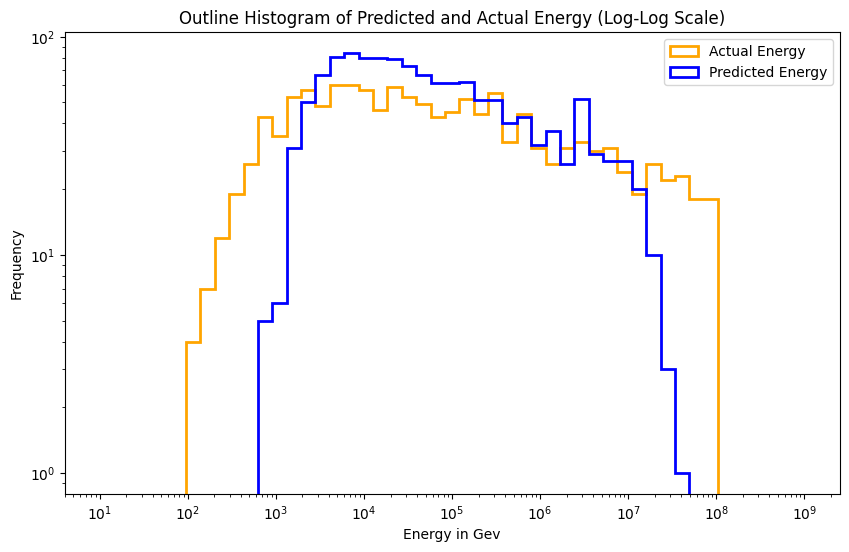

In [27]:
plt.figure(figsize=(10, 6))

plt.hist(y_test_original, bins=BINS, histtype='step', color='orange', linewidth=2, label='Actual Energy')
plt.hist(y_pred, bins=BINS, histtype='step', color='blue', linewidth=2, label='Predicted Energy')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Energy in Gev')
plt.ylabel('Frequency')
plt.title('Outline Histogram of Predicted and Actual Energy (Log-Log Scale)')

plt.legend()

plt.show()

In [171]:
import seaborn as sns
residuals = y_test_original - y_pred

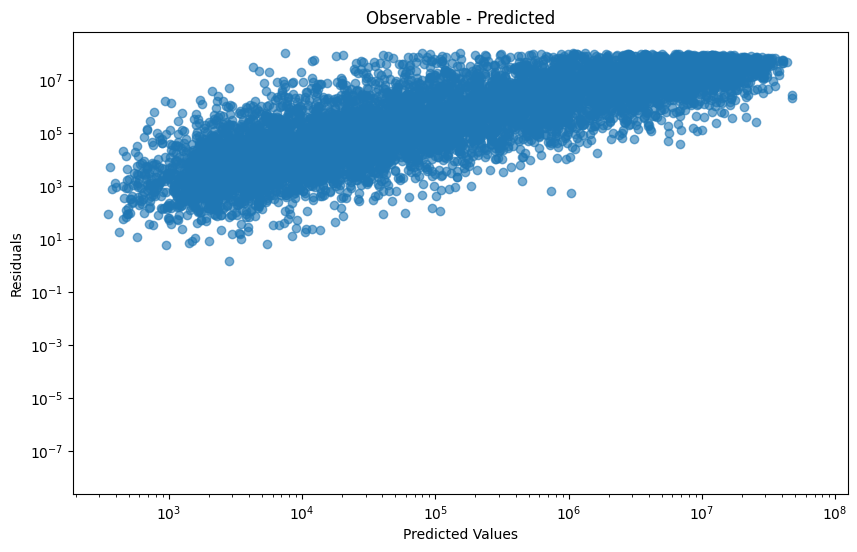

In [172]:
plt.figure(figsize=(10, 6))
#sns.residplot(x=y_pred, y=residuals,scatter_kws={'alpha': 0.5})
plt.scatter(y_pred, residuals, alpha=0.6)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Observable - Predicted')
plt.axhline(y=0, color='r', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.show()

MAE = 3628433.514, MSE = 153862414162279.438, R2 = 0.166


/Users/meskara/Library/Python/3.9/lib/python/site-packages/numpy/ma/extras.py:700: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.multiply(a, wgt,


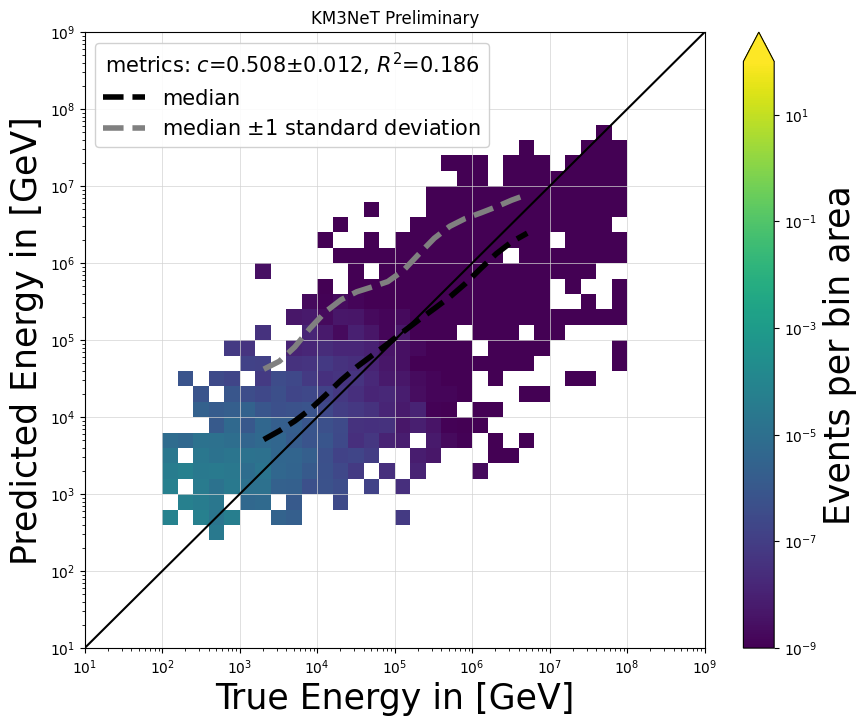

In [90]:
import h5py
import pandas as pd
import awkward as ak
import km3io as ki
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

from matplotlib.colors import LogNorm
from scipy.ndimage import gaussian_filter

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

# --------------------------------------------------------------------------
# 1) LOAD & PREPARE DATA (Your First Code)
# --------------------------------------------------------------------------
filename = '/Users/meskara/Desktop/Energy_Reconstruction/Data_for_ML.h5'
Data = h5py.File(filename)

y = Data['E'][:]            # Target (energy)
a = Data['a'][:]
dir_x = Data['dir_x'][:]
dir_y = Data['dir_y'][:]
dir_z = Data['dir_z'][:]
pos_x = Data['pos_x'][:]
pos_y = Data['pos_y'][:]
pos_z = Data['pos_z'][:]
t = Data['t'][:]
tdc = Data['tdc'][:]
tot = Data['tot'][:]
trig = Data['trig'][:]

X = np.column_stack([
    a,
    dir_x,
    dir_y,
    dir_z,
    pos_x,
    pos_y,
    pos_z,
    t,
    tdc,
    tot,
    trig
])

y_log= np.log10(y)  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  

X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, 
    y_log, 
    test_size=0.2, 
    random_state=42
)
model = HistGradientBoostingRegressor(

).fit(X_train, y_train_log)

y_pred_log = model.predict(X_test)
y_pred = 10 ** y_pred_log       # predicted energy
y_test_original = 10 ** y_test_log  # true energy

mae = mean_absolute_error(y_test_original, y_pred)
mse = mean_squared_error(y_test_original, y_pred)
r2_val = r2_score(y_test_original, y_pred)

print(f"MAE = {mae:.3f}, MSE = {mse:.3f}, R2 = {r2_val:.3f}")

# If you want your original 1D log-log hist plot:
# --------------------------------------------------------------------------
# BINS_1D = np.logspace(1, 9, 50)
# plt.figure(figsize=(10, 6))
# plt.hist(y_test_original, bins=BINS_1D, histtype='step', color='orange', linewidth=2, label='Actual')
# plt.hist(y_pred,         bins=BINS_1D, histtype='step', color='blue',   linewidth=2, label='Predicted')
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel('Energy [GeV]')
# plt.ylabel('Frequency')
# plt.title('1D Histogram: Predicted vs. Actual Energy (Log-Log Scale)')
# plt.legend()
# plt.show()

# --------------------------------------------------------------------------
# 2) 2D Correlation
# --------------------------------------------------------------------------

# Calculating the correlation coefficient
def m(x, w):
    """Weighted Mean"""
    return np.sum(x * w) / np.sum(w)

def cov(x, y, w):
    """Weighted Covariance"""
    return np.sum(w * (x - m(x, w)) * (y - m(y, w))) / np.sum(w)

def corr(x, y, w):
    """Weighted Correlation"""
    return cov(x, y, w) / np.sqrt(cov(x, x, w) * cov(y, y, w))

def corr_err(x, y, w):
    """Weighted Correlation"""
    return np.sqrt((1.-(corr(x,y,w))**2) / (len(x)-2.))

def weighted_avg_and_std(values, weights) -> (float,float):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.ma.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.ma.average((values-average)**2, weights=weights)
    return (average, np.sqrt(variance))

def weighted_quantiles(values, weights, quantiles=0.5, interpolate=False):

    if len(values):
        i = values.argsort()
        sorted_weights = weights[i]
        sorted_values = values[i]
        Sn = sorted_weights.cumsum()

        if interpolate:
            Pn = (Sn - sorted_weights/2 ) / Sn[-1]
            return np.interp(quantiles, Pn, sorted_values)
        else:
            return sorted_values[np.searchsorted(Sn, quantiles * Sn[-1])]
    else:
        return np.nan

w = np.ones_like(y_test_original)

BINS = np.append([0],np.logspace(-3,11,14*5+1))

H, x_bin_edges, y_bin_edges = np.histogram2d(
    y_test_original,y_pred,
    bins=[BINS,BINS],
    weights=w
#     weights=w_test_scaled
)

counts, x_bin_edges, y_bin_edges = np.histogram2d(y_test_original,y_pred,bins=[BINS,BINS],)

x_bin_centers = 0.5*(x_bin_edges[:-1]+x_bin_edges[1:])
y_bin_centers = 0.5*(y_bin_edges[:-1]+y_bin_edges[1:])

x_temp = np.asarray(y_test_original)
y_temp = np.asarray(y_pred)

xses = np.floor(x_bin_centers).astype(int)

avgs = np.array([weighted_quantiles(y_temp[(x_temp>=x_bin_edges[i])&(x_temp<x_bin_edges[i+1])],weights=w[(x_temp>=x_bin_edges[i])&(x_temp<x_bin_edges[i+1])], interpolate=False) for i in range(len(x_bin_centers))])
stds = np.array([weighted_avg_and_std(values=y_temp[(x_temp>=x_bin_edges[i])&(x_temp<x_bin_edges[i+1])], weights=w[(x_temp>=x_bin_edges[i])&(x_temp<x_bin_edges[i+1])])[1] for i in range(len(x_bin_centers))]) # this computes weighted std
cts = np.array([np.sum((x_temp>=x_bin_edges[i])&(x_temp<x_bin_edges[i+1])) for i in range(len(x_bin_centers))])

sig = 1.5

avg_m_std=avgs-stds
low_slc=avg_m_std>-np.inf

x_up=xses
y_up=gaussian_filter(avgs+stds,sigma=sig)
x_mid=x_up
y_mid=gaussian_filter(avgs,sigma=sig)
x_down=xses[low_slc]
y_down=gaussian_filter(avg_m_std,sigma=sig)[low_slc]

# to norm by bin area:
dx = np.diff(BINS)
area = dx[:,  None] * dx

plt.figure(figsize=(10, 8))

pcm = plt.pcolormesh(
        x_bin_edges, 
        y_bin_edges, 
        (H / area).T, 
        cmap='viridis',
        norm=LogNorm(vmin=1e-9, vmax=1e2),
        shading='auto'
    )

plt.xlabel("True Energy in [GeV]", fontsize=25)
plt.ylabel("Predicted Energy in [GeV]", fontsize=25) #  (JMuon)
plt.grid(color='lightgray', linestyle='-', linewidth=0.5,animated=True,zorder=-1)
plt.plot(plt.xlim(), plt.ylim(),color='k',linestyle='-') # plot the diagonal

plt.plot(x_mid,y_mid, color='k',linestyle='dashed',linewidth=4,label='median')
plt.plot(x_down, y_down, color='gray',linestyle='dashed',linewidth=4)
plt.plot(x_up, y_up, color='gray', label='median $\pm$1 standard deviation',linestyle='dashed',linewidth=4)

plt.loglog(base = 10)

# we compute the flattened arrays of values for 2D bins to compute bin-wise correlation and R2-score:
trues = []
preds = []
bin_weights = []

for xbe in range(len(x_bin_edges)-1):
    for ybe in range(len(y_bin_edges)-1):
        current_bin = (x_temp>=x_bin_edges[xbe]) & (x_temp<x_bin_edges[xbe+1]) & (y_temp>=y_bin_edges[ybe]) & (y_temp<y_bin_edges[ybe+1])
        bin_weights.append(np.sum(w[current_bin]))
        trues.append(x_bin_edges[1:][xbe])
        preds.append(y_bin_edges[1:][ybe])

trues=np.array(trues)
preds=np.array(preds)
bin_weights=np.array(bin_weights)

plt.xlim(1e1,1e9)
plt.ylim(1e1,1e9)

c=corr(trues,preds, bin_weights)
c_err=corr_err(trues,preds, bin_weights)
r2=r2_score(trues,preds,sample_weight=bin_weights)
s=f'metrics: $c$={c:.3f}$\pm${c_err:.3f}, $R^2$={r2:.3f}'

plt.title('KM3NeT Preliminary')
title_txt=s
plt.legend(title=title_txt,title_fontsize=15,fontsize=15, markerscale=1,loc='upper left',framealpha=0.9) # , loc='upper right'  , bbox_to_anchor=(0.7,1),framealpha=0.9
# plt.title("detector: "+DET+" | "+sel_txt+"metrics: $c$=%3.2f$\pm$%3.2f, $R^2$=%3.2f" % (corr(trues,preds, bin_weights),corr_err(trues,preds, bin_weights),r2_score(trues,preds,sample_weight=bin_weights)),size = 20)


plt.colorbar(pcm, extend='max').set_label(label='Events per bin area', size=25)